In [ ]:
# Step 1: Install Kaggle API
!pip install kaggle

# Step 2: Set up Kaggle configuration
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Step 3: Create a directory for the dataset and download it
os.makedirs('sample_data', exist_ok=True)
!kaggle datasets download -d santosokello/crop-disease-prediction-datasets -p sample_data --unzip

print("Dataset downloaded and extracted into 'sample_data' folder.")

# Step 4: Check the files
import os
print(os.listdir('sample_data'))


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/santosokello/crop-disease-prediction-datasets
License(s): MIT
 98% 388M/395M [00:02<00:00, 177MB/s]
100% 395M/395M [00:02<00:00, 174MB/s]
Dataset downloaded and extracted into 'sample_data' folder.
['README.md', 'anscombe.json', 'train2', 'mnist_train_small.csv', 'mnist_test.csv', 'california_housing_train.csv', 'california_housing_test.csv']


First few image files:
Corn_(maize)___Northern_Leaf_Blight
Tomato___Late_blight
Apple___Cedar_apple_rust
Potato___Virus
Tomato___Leaf_Mold
Found 4520 images belonging to 24 classes.
Found 1128 images belonging to 24 classes.
Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.2065 - loss: 2.9985 - val_accuracy: 0.5230 - val_loss: 1.5180
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.6786 - loss: 1.0305 - val_accuracy: 0.6002 - val_loss: 1.1996
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.8538 - loss: 0.4821 - val_accuracy: 0.5940 - val_loss: 1.5620
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.9360 - loss: 0.2202 - val_accuracy: 0.6339 - val_loss: 1.5022
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.9818 - loss: 0.0766 - val_accuracy: 0.6401 - val_loss: 1.6553
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9963 - loss: 0.0303 - val_accuracy: 0.6649 - val_loss: 1.6069
E

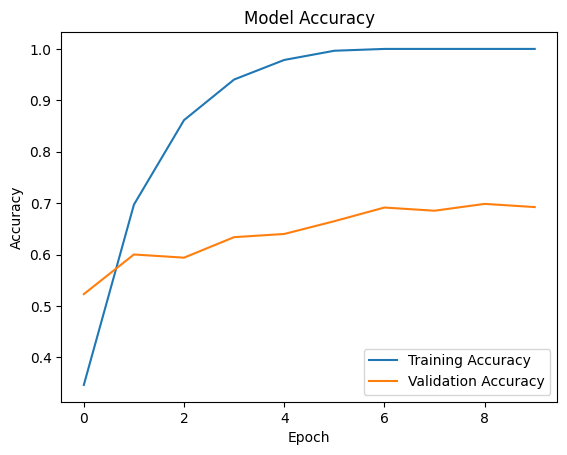

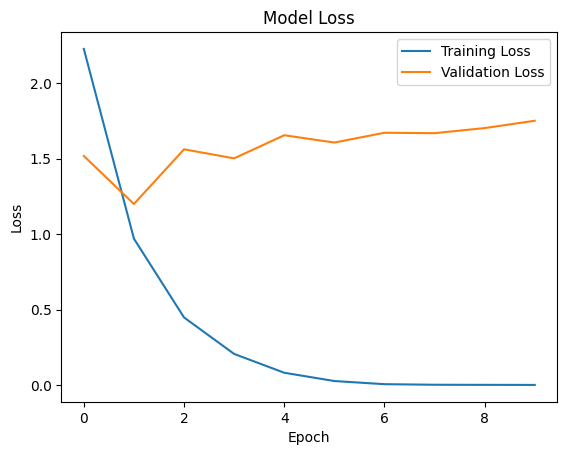

In [ ]:
# Step 5: Explore the Dataset
import os

# List the contents of the sample_data folder
image_folder = 'sample_data/train2'
image_files = os.listdir(image_folder)

# Display the first few images and their paths
print("First few image files:")
for i in range(5):
    print(image_files[i])

# Step 6: Data Preprocessing and Setup for CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up image data generator
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Load and preprocess images
train_generator = datagen.flow_from_directory(
    image_folder,  # Directory containing images
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical',  # Use 'binary' for binary classification
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    image_folder,  # Directory containing images
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Use 'binary' for binary classification
    subset='validation'
)

# Step 7: Define and Compile the CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Step 9: Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

# Step 10: Visualize Results
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()